In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:

df = pd.read_csv('superbowl_commercials.csv')


In [5]:
print("Dataset Dimensions:", df.shape)
print("Data Types:\n", df.dtypes)


Dataset Dimensions: (249, 16)
Data Types:
 Year                       int64
Brand                     object
Superbowl Ads Link        object
Youtube Link              object
Funny                       bool
Shows Product Quickly       bool
Patriotic                   bool
Celebrity                   bool
Danger                      bool
Animals                     bool
Uses Sex                    bool
Length                     int64
Estimated Cost           float64
Youtube Views            float64
Youtube Likes            float64
TV Viewers               float64
dtype: object


In [6]:
print("Dataset Dimensions:", df.shape)
print("Data Types:\n", df.dtypes)


Dataset Dimensions: (249, 16)
Data Types:
 Year                       int64
Brand                     object
Superbowl Ads Link        object
Youtube Link              object
Funny                       bool
Shows Product Quickly       bool
Patriotic                   bool
Celebrity                   bool
Danger                      bool
Animals                     bool
Uses Sex                    bool
Length                     int64
Estimated Cost           float64
Youtube Views            float64
Youtube Likes            float64
TV Viewers               float64
dtype: object


In [7]:
print("Summary Statistics:\n", df.describe())


Summary Statistics:
               Year      Length  Estimated Cost  Youtube Views  Youtube Likes  \
count   249.000000  249.000000      249.000000   2.370000e+02     231.000000   
mean   2010.469880   44.457831        5.156888   1.569672e+06    5086.592713   
std       6.002024   21.331845        4.075974   1.229921e+07   28387.597549   
min    2000.000000   10.000000        0.980000   5.000000e+00       0.000000   
25%    2006.000000   30.000000        2.400000   7.256000e+03      20.500000   
50%    2010.000000   30.000000        3.150000   4.730900e+04     146.000000   
75%    2015.000000   60.000000        5.900000   1.813620e+05     704.500000   
max    2021.000000  180.000000       31.730000   1.814238e+08  295000.000000   

       TV Viewers  
count  249.000000  
mean   100.475341  
std     12.819811  
min     84.340000  
25%     90.750000  
50%     98.730000  
75%    111.010000  
max    232.000000  


In [8]:
print("Missing Values:\n", df.isnull().sum())


Missing Values:
 Year                      0
Brand                     0
Superbowl Ads Link        0
Youtube Link              9
Funny                     0
Shows Product Quickly     0
Patriotic                 0
Celebrity                 0
Danger                    0
Animals                   0
Uses Sex                  0
Length                    0
Estimated Cost            0
Youtube Views            12
Youtube Likes            18
TV Viewers                0
dtype: int64


In [10]:
# Fill numeric columns with the mean
df[df.select_dtypes(include=['number']).columns] = df.select_dtypes(include=['number']).apply(lambda x: x.fillna(x.mean()))

# Fill string (or object) columns with the most frequent value (mode)
df[df.select_dtypes(include=['object']).columns] = df.select_dtypes(include=['object']).apply(lambda x: x.fillna(x.mode()[0]))



In [11]:
df.drop_duplicates(inplace=True)


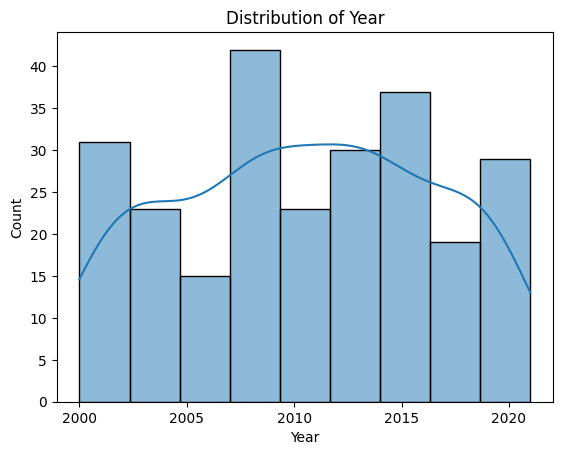

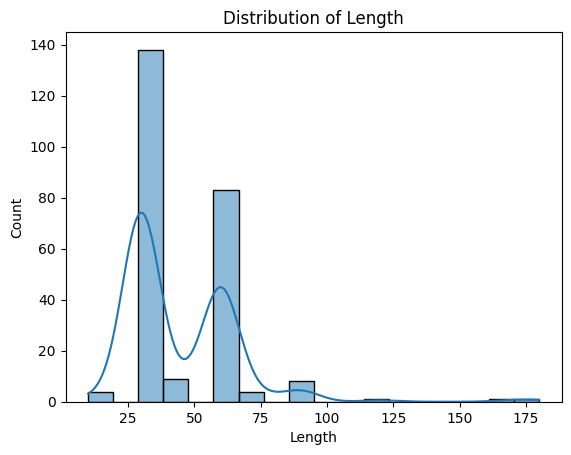

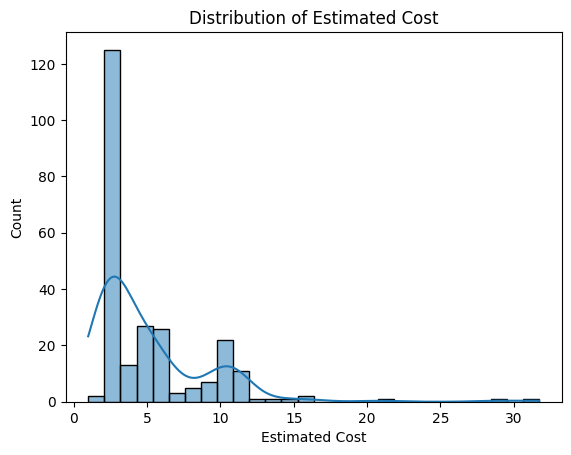

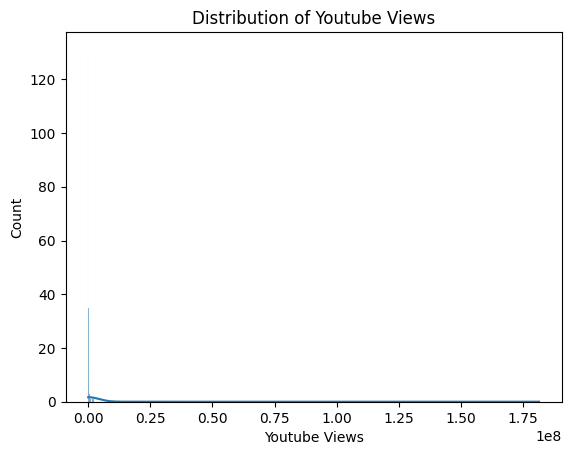

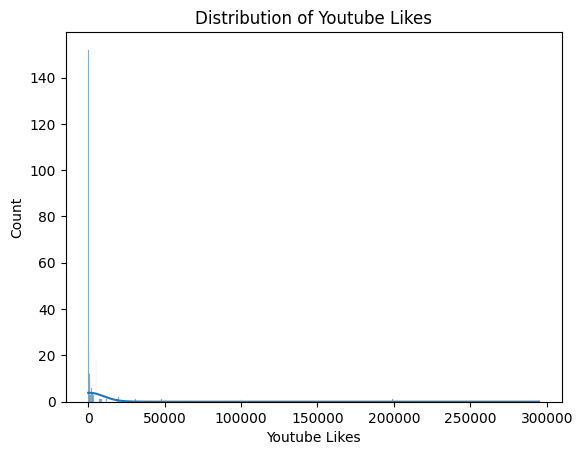

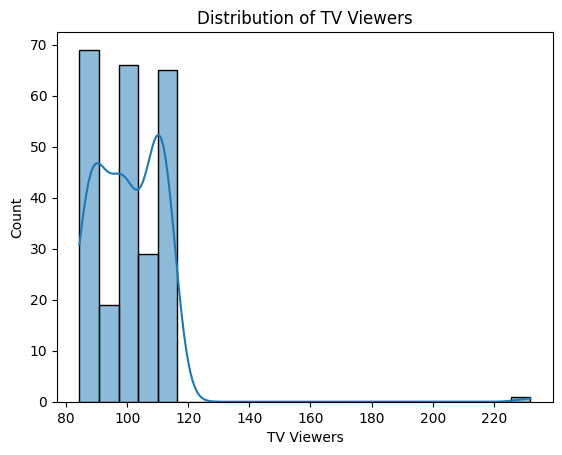

In [12]:
for column in df.select_dtypes(include=[np.number]).columns:
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()


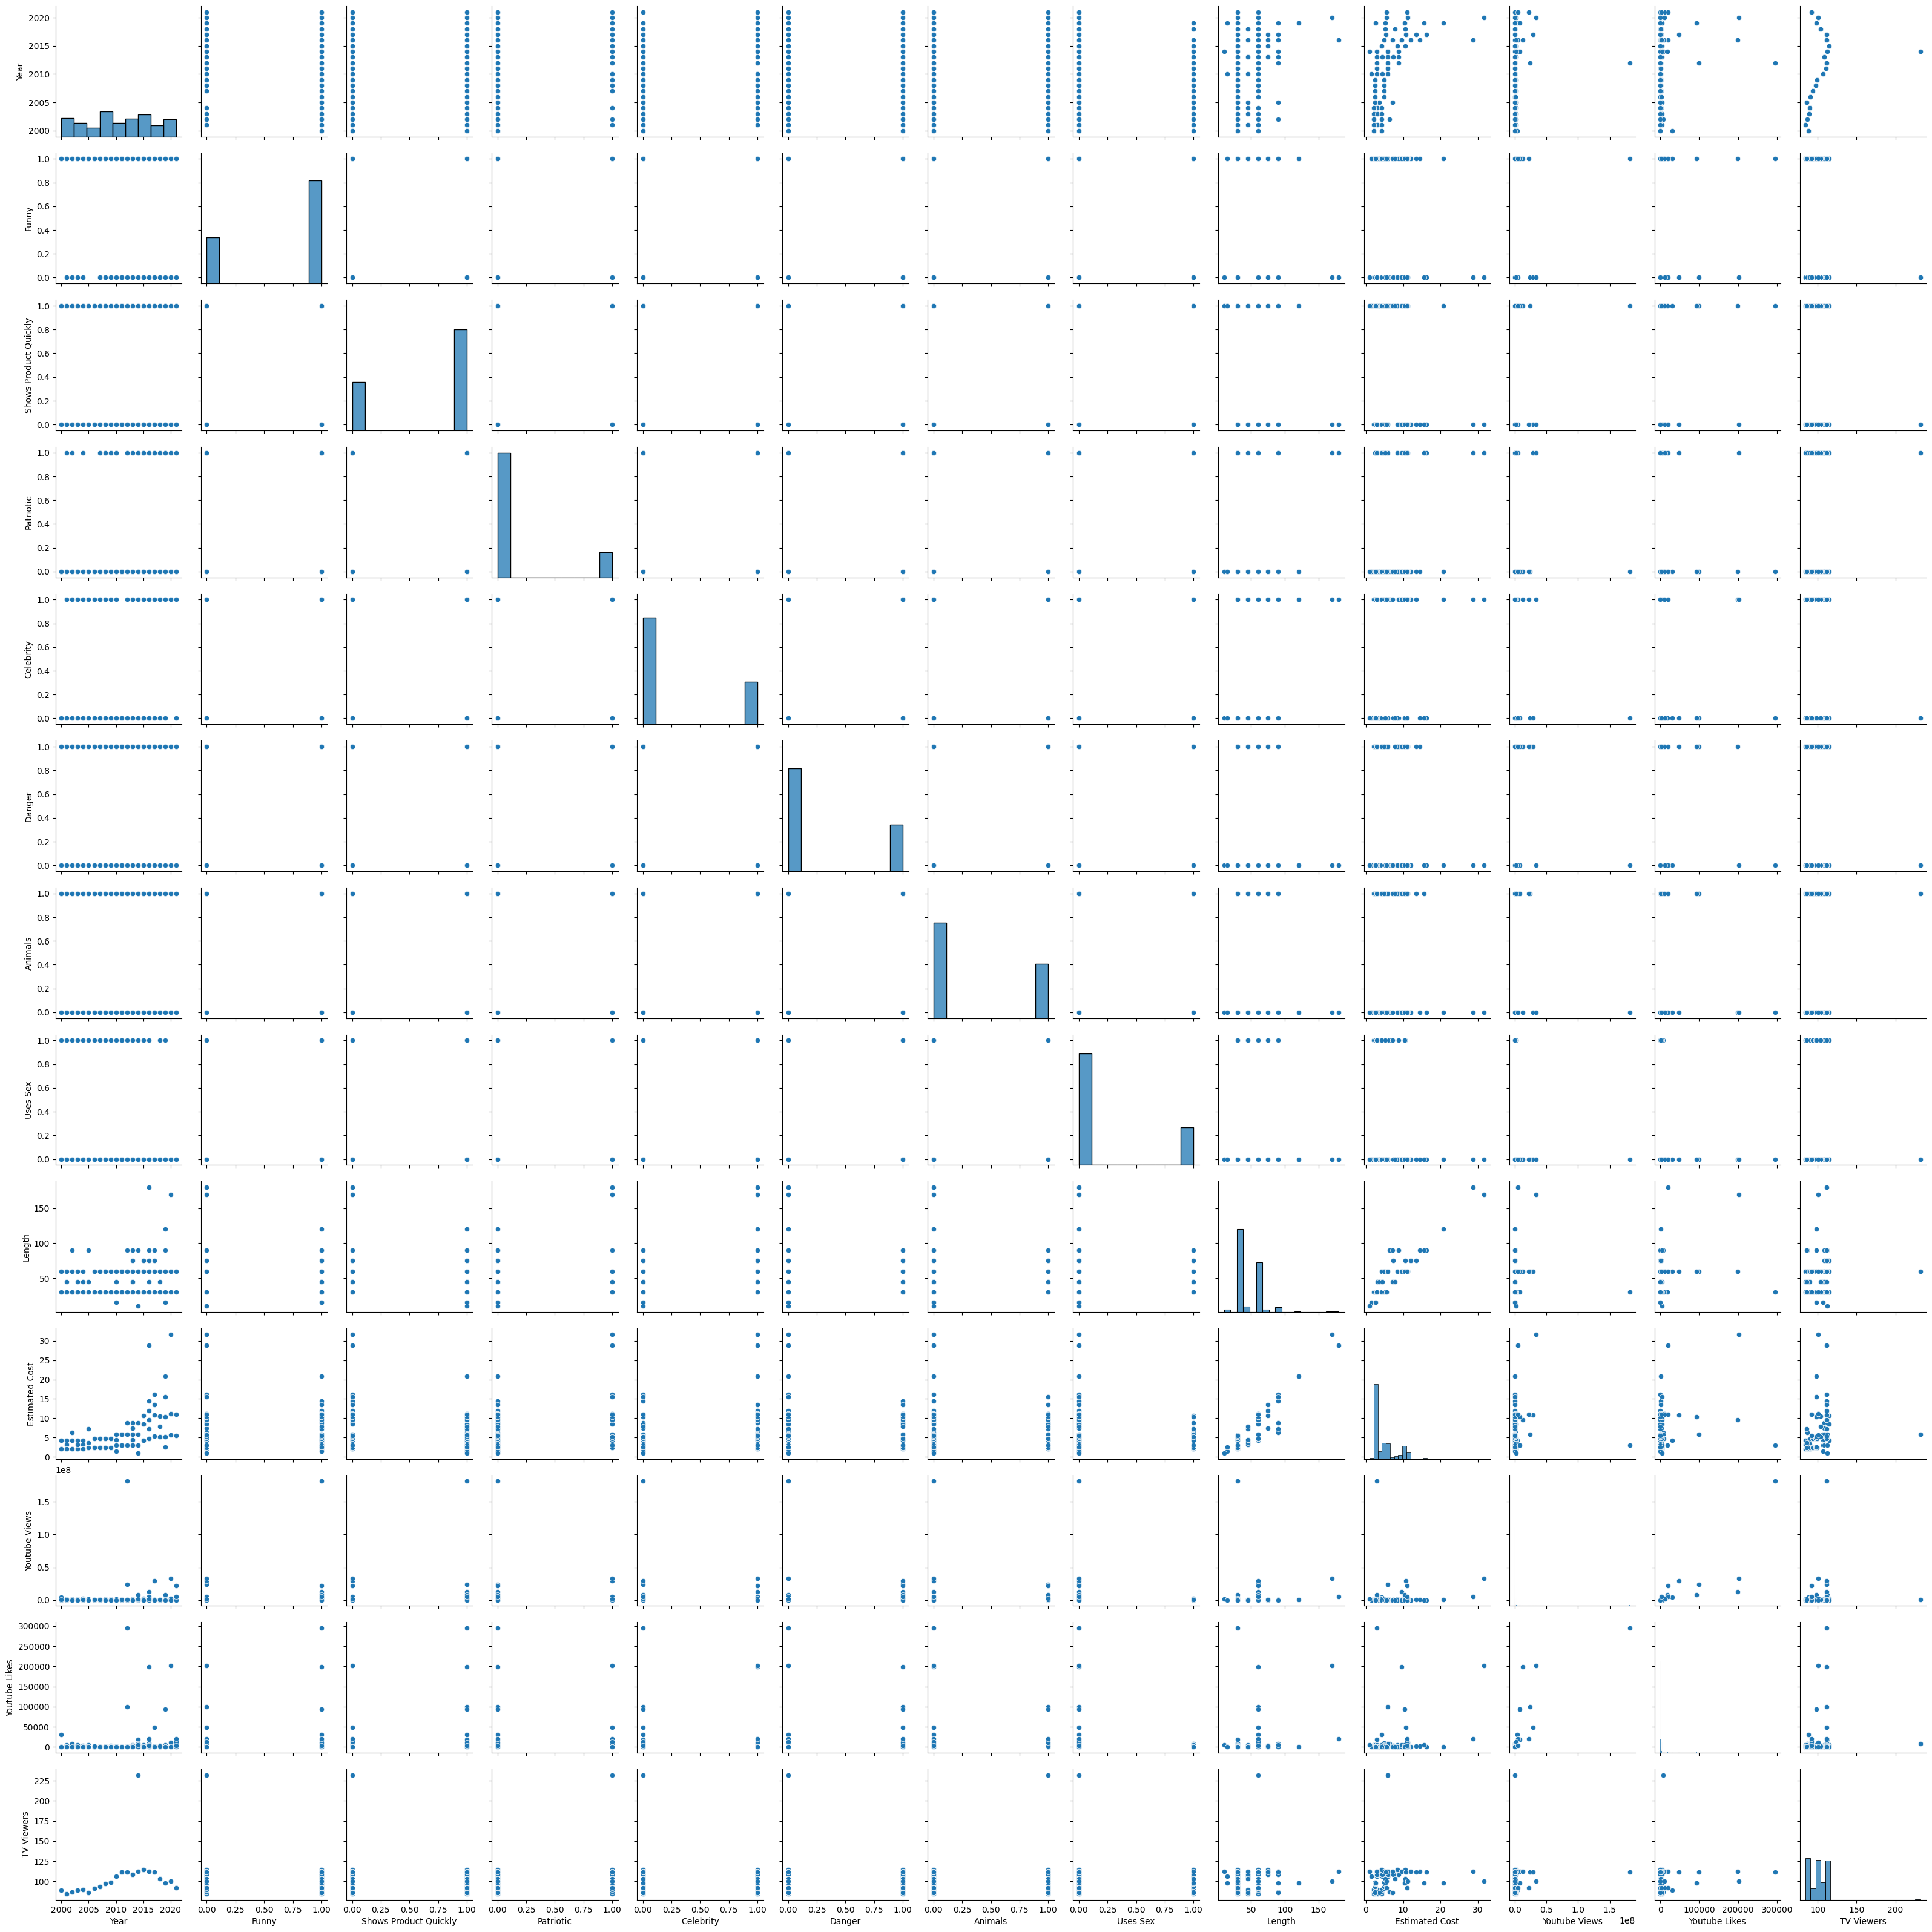

In [13]:
sns.pairplot(df)
plt.show()


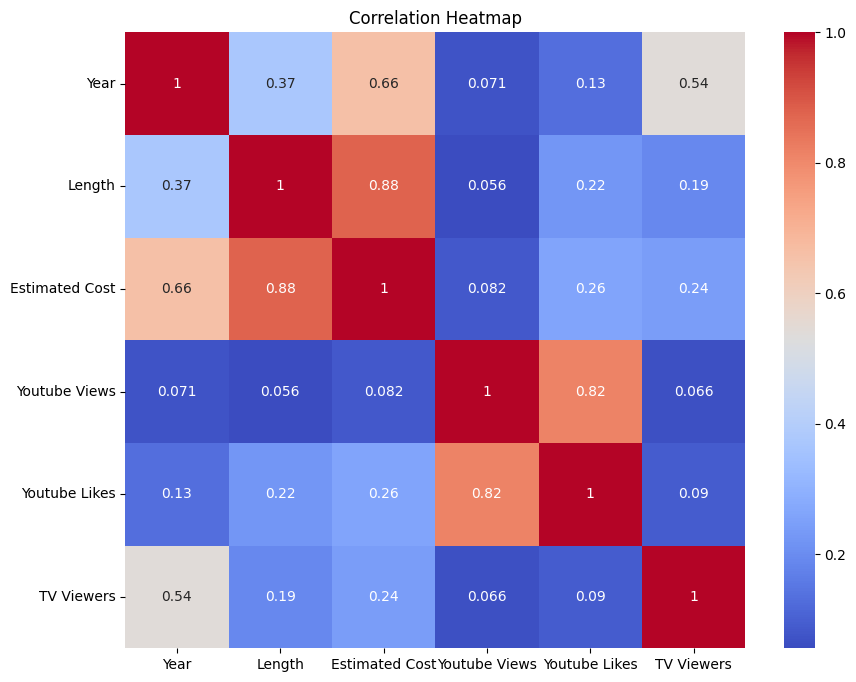

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()




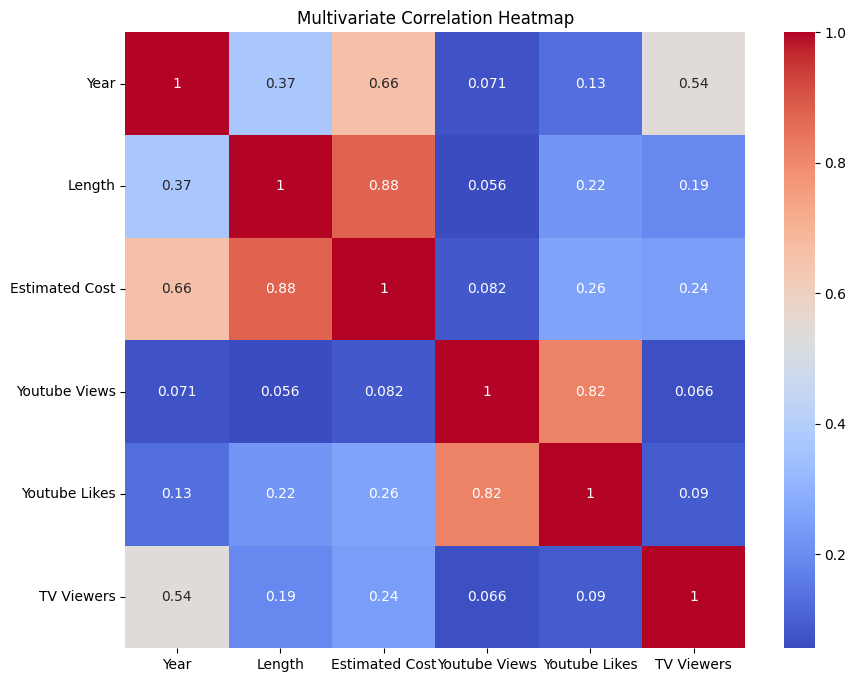

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_df.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Multivariate Correlation Heatmap")
plt.show()



In [20]:
print(df.columns)


Index(['Year', 'Brand', 'Superbowl Ads Link', 'Youtube Link', 'Funny',
       'Shows Product Quickly', 'Patriotic', 'Celebrity', 'Danger', 'Animals',
       'Uses Sex', 'Length', 'Estimated Cost', 'Youtube Views',
       'Youtube Likes', 'TV Viewers'],
      dtype='object')


In [22]:
X = df.drop('Youtube Views', axis=1)  # Features
y = df['Youtube Views']  # Target variable



In [24]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Fill or drop missing values as needed
# Example: Dropping rows with any missing values
df_cleaned = df.dropna()
# Alternatively, you can fill missing values
# df['column_name'].fillna(value, inplace=True)



Missing values in each column:
Year                     0
Brand                    0
Superbowl Ads Link       0
Youtube Link             0
Funny                    0
Shows Product Quickly    0
Patriotic                0
Celebrity                0
Danger                   0
Animals                  0
Uses Sex                 0
Length                   0
Estimated Cost           0
Youtube Views            0
Youtube Likes            0
TV Viewers               0
dtype: int64


In [25]:
print("Shape of cleaned DataFrame:", df_cleaned.shape)


Shape of cleaned DataFrame: (249, 16)


In [26]:
# Define features and target variable
X = df_cleaned.drop('Youtube Views', axis=1)  # Adjust this if needed
y = df_cleaned['Youtube Views']

# Convert categorical variables using one-hot encoding if necessary
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 19188309841168.754
R-squared: -8.332328246127652


In [27]:

df_cleaned.to_csv('cleaned_data.csv', index=False)

import joblib
joblib.dump(model, 'linear_model.pkl')


['linear_model.pkl']